## import libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load data and get info

In [2]:
insurance=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.duplicated().sum()

1

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Visualization

<Axes: ylabel='Frequency'>

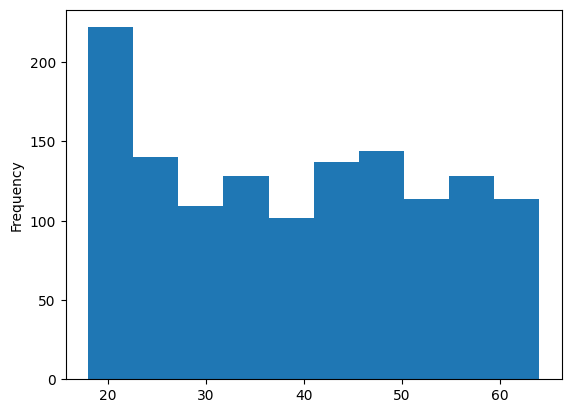

In [9]:
insurance['age'].plot(kind='hist')

<Axes: xlabel='sex'>

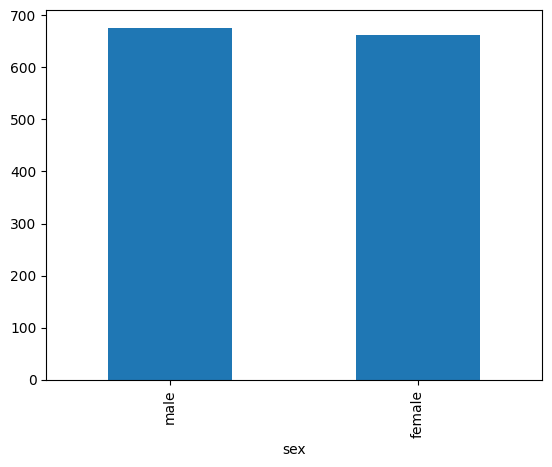

In [10]:
insurance['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

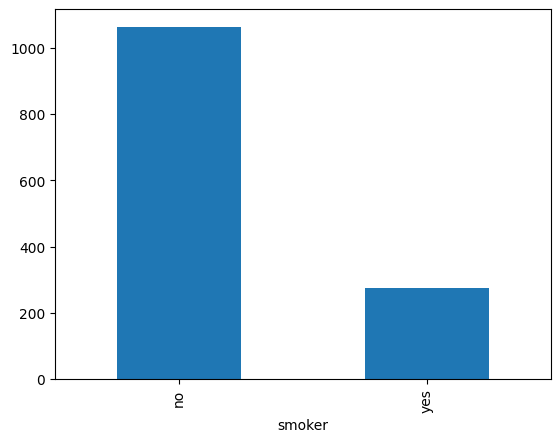

In [11]:
insurance['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

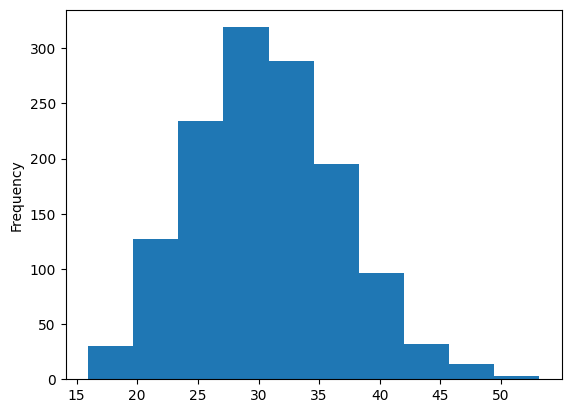

In [12]:
insurance['bmi'].plot(kind='hist')

<Axes: xlabel='children'>

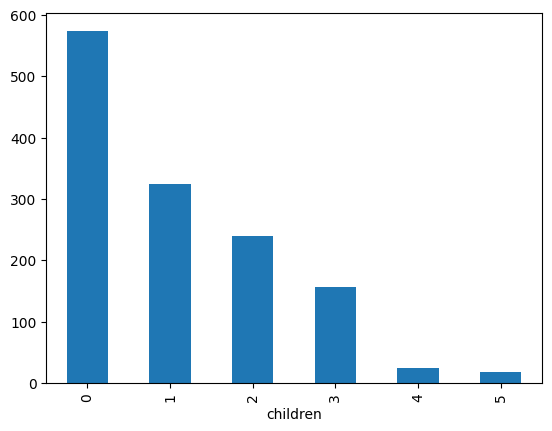

In [13]:
insurance['children'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

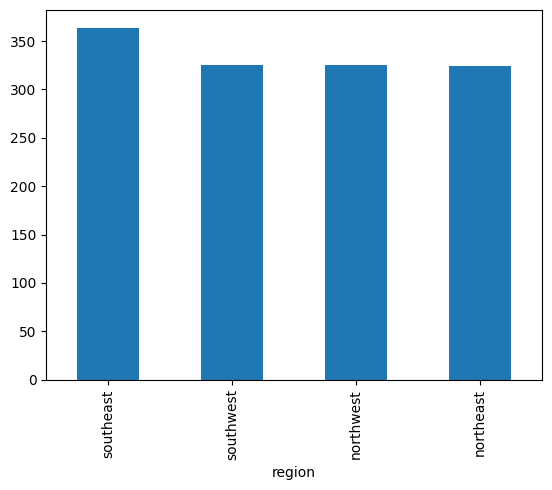

In [14]:
insurance['region'].value_counts().plot(kind='bar')

## preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
sexx = pd.DataFrame({'sex': ['male', 'female']})
smokerr = pd.DataFrame({'smoker': ['yes', 'no']})
regionn = pd.DataFrame({'region': ['southeast', 'southwest','northeast',' northwest']})

print(f"Before Encoding the Data:\n\n{sexx}\n")
print(f"Before Encoding the Data:\n\n{smokerr}\n")
print(f"Before Encoding the Data:\n\n{regionn}\n")

Before Encoding the Data:

      sex
0    male
1  female

Before Encoding the Data:

  smoker
0    yes
1     no

Before Encoding the Data:

       region
0   southeast
1   southwest
2   northeast
3   northwest



In [16]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['region'] = le.fit_transform(insurance['region'])

In [17]:
sexx

,sex
0,male
1,female


In [18]:
smokerr

,smoker
0,yes
1,no


In [19]:
regionn

,region
0,southeast
1,southwest
2,northeast
3,northwest


In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Build Modwl

In [21]:
x = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [22]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [25]:
x_train

,age,sex,bmi,children,smoker,region
316,50,1,32.205,0,0,1
340,24,0,27.600,0,0,3
151,48,1,29.700,0,0,2
1282,18,0,21.660,0,1,0
557,34,1,34.210,0,0,2
...,...,...,...,...,...,...
583,32,0,23.650,1,0,2
332,61,0,31.160,0,0,1
1293,46,1,25.745,3,0,1
1115,55,1,32.670,1,0,2


In [26]:
x_test

,age,sex,bmi,children,smoker,region
1313,19,0,34.700,2,1,3
1254,34,0,27.720,0,0,2
372,42,0,33.155,1,0,0
937,39,0,24.225,5,0,1
484,48,1,34.300,3,0,3
...,...,...,...,...,...,...
427,18,0,29.165,0,0,0
1153,35,0,35.815,1,0,1
973,19,0,40.500,0,0,3
608,28,1,26.980,2,0,0


In [27]:
y_train

316      8835.26495
340     18955.22017
151      7789.63500
1282    14283.45940
557      3935.17990
           ...     
583     17626.23951
332     13429.03540
1293     9301.89355
1115    10807.48630
1104    20420.60465
Name: charges, Length: 1070, dtype: float64

In [28]:
y_test

1313    36397.576000
1254     4415.158800
372      7639.417450
937      8965.795750
484      9563.029000
            ...     
427      7323.734819
1153     5630.457850
973      1759.338000
608      4435.094200
775     10560.491700
Name: charges, Length: 268, dtype: float64

In [29]:
Model= LinearRegression()

In [30]:
Model.fit(x_train,y_train)

LinearRegression()

In [31]:
t=Model.predict(x_train)

In [32]:
r2_train = metrics.r2_score(y_train, t)
print('R squared vale : ', r2_train)

R squared vale :  0.7388805137721672


In [33]:
n=Model.predict(x_test)

In [34]:
r2_test = metrics.r2_score(y_test, n)
print('R squared vale : ', r2_test)

R squared vale :  0.7993819717035825
